In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import IPython
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import plotly.graph_objects as go

# Objective
Spot1ny is a project to compare the music tastes of two users based on their Spotify playlists. Features of the playlists such as songs, artists, albums, popularity, and genres will be used to compare the similarities between them. 

I am currently working on the criteria to decide whether or not the two "match". Also, I am building a recomendation system based on the genres and audio features of the playlists. 

# Data acquisition
The playlists are obtained using Spotipy, a library for Spotify's API. Detail codes can be found in the Python files in the same directory.

# Data exploration and preprocessing

In [100]:
# Read files
songs_df_1 = pd.read_csv("user_songs_1.csv", encoding= "utf-8-sig")
songs_df_2 = pd.read_csv("user_songs_2.csv", encoding= "utf-8-sig")

user_info_df_1 = pd.read_csv("user_info_1.csv")
user_info_df_2 = pd.read_csv("user_info_2.csv")

audio_features_df_1 = pd.read_csv("audio_features_1.csv")
audio_features_df_2 = pd.read_csv("audio_features_2.csv")

user1 = str(user_info_df_1["display_name"][0])
user2 = str(user_info_df_2["display_name"][0]) 

billboard_100 = 

In [95]:
print(len(songs_df_1))
print(len(songs_df_2))

114
121


## Dropping duplicate records in the playlists

In [96]:
# Drop duplicate records
songs_df_1.drop_duplicates(subset = ["id"], keep = "first", inplace = True)
songs_df_2.drop_duplicates(subset = ["id"], keep = "first", inplace = True)

In [97]:
print(len(songs_df_1))
print(len(songs_df_2))

114
119


In [98]:
songs_df_1.head(10)

,id,song,artist,album,popularity,duration,genres
0,1fBl642IhJOE5U319Gy2Go,Animal,Neon Trees,Habits,72,212293,"['modern alternative rock', 'modern rock', 'po..."
1,4IBuAtdsM6psUgfhHgoy4e,What If,Jason Derulo,Jason Derulo,39,203240,"['dance pop', 'pop', 'pop rap', 'post-teen pop']"
2,5rLi8B8qgk6qThwRnKHW2P,The Ballad of Mona Lisa,Panic! At The Disco,Vices & Virtues,68,226680,['modern rock']
3,7zAt4tdL44D3VuzsvM0N8n,Afterlife,Avenged Sevenfold,Avenged Sevenfold,69,352426,"['alternative metal', 'nu metal']"
4,1BLfQ6dPXmuDrFmbdfW7Jl,A Little Piece of Heaven,Avenged Sevenfold,Avenged Sevenfold,68,480706,"['alternative metal', 'nu metal']"
5,7Hr1Ignop7cymbE3FbOtXa,So Far Away,Avenged Sevenfold,Nightmare,66,326813,"['alternative metal', 'nu metal']"
6,3VA4sjTMSTTF02hFGmlpJh,crushcrushcrush,Paramore,Riot!,65,189373,"['candy pop', 'pixie', 'pop emo', 'pop punk']"
7,17QodENDMk3o1nPgPqfs3Y,Your Surrender,Neon Trees,Habits,33,220853,"['modern alternative rock', 'modern rock', 'po..."
8,5zpDHEU12zATwLGvozxPw2,Lighters,Bad Meets Evil,Hell: The Sequel (Deluxe),70,303813,"['detroit hip hop', 'gangster rap', 'hip hop',..."
9,1yjY7rpaAQvKwpdUliHx0d,Still into You,Paramore,Paramore,82,216013,"['candy pop', 'pixie', 'pop emo', 'pop punk']"


In [55]:
songs_df_2.head(10)

,id,song,artist,album,popularity,duration,genres
0,4fpEuKIzTLmMJnYwFU0oqr,Death with Dignity,Sufjan Stevens,Carrie & Lowell,33,239508,"['baroque pop', 'chamber pop', 'freak folk', '..."
1,4tcwdkKzXn0Tsyz3WtH3gc,In My Mind (feat. Brian Viglione),Amanda Palmer,Goes Down Under,0,253506,"['anti-folk', 'dark cabaret', 'indie pop', 'pi..."
2,7yC7FWZz24L43brXzNpLWT,To All of You,Syd Matters,Someday We Will Foresee Obstacles,56,283266,"['folktronica', 'french indie folk']"
3,3jfZ9M23l0L7RxzYMTgBTv,Looking Out for You,Joy Again,Looking Out for You,82,179499,"['indie garage rock', 'indie pop']"
4,24HPkbkXJsIFC4eyg63zgQ,Wraith Pinned to the Mist and Other Games,of Montreal,The Sunlandic Twins,58,255613,"['alternative dance', 'alternative rock', 'ant..."
5,5FeFPGq2whLMxNGQ7Fpp35,No Risk,Cults,Host,2,153446,"['experimental pop', 'indie surf']"
6,7126kIzOFbWsvWcz6s4ITQ,Into Happiness,Phantogram,Ceremony,47,201066,"['chillwave', 'electropop', 'indietronica', 'm..."
7,5fztwLyeoasBgTU8ISdnYN,classic j dies and goes to hell part 1,glass beach,the first glass beach album,21,304144,"['5th wave emo', 'modern power pop']"
8,0UV5zxRMz6AO4ZwUOZNIKI,Where'd All the Time Go?,Dr. Dog,"Shame, Shame (Deluxe Edition)",78,234800,"['indie folk', 'indie pop', 'indie rock', 'mod..."
9,1DrarMEXcAgQs2nyCPE3Jv,Morning Bells,Hether,WULM (acoustic) / Morning Bells,25,202000,"['bedroom pop', 'indie garage rock', 'indie po..."


## Visualizations

### Songs visualizations

In [ ]:
# Miliseconds to minutes
songs_df_1["duration"] = (songs_df_1["duration"] * 0.001 / 60).round(2)
songs_df_2["duration"] = (songs_df_2["duration"] * 0.001 / 60).round(2)

Text(0.5, 1.0, "Average songs' durations")

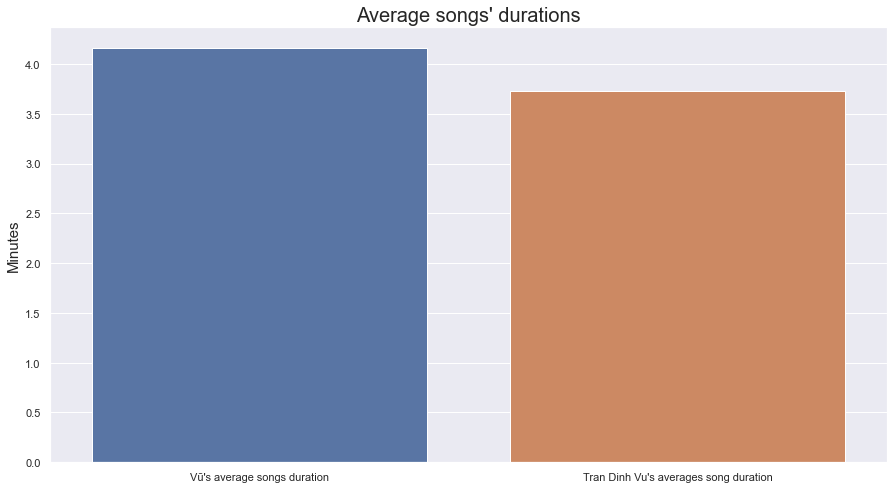

In [57]:
sns.set(rc = {'figure.figsize':(15,8)})
users_durations = [user1 + "'s average songs duration", user2 + "'s averages song duration"]
durations_mean = [songs_df_1["duration"].mean(), songs_df_2["duration"].mean()]
p = sns.barplot(x= users_durations, y= durations_mean)
p.set_ylabel("Minutes", fontsize = 15)
p.set_title("Average songs' durations", fontsize = 20)

Text(0.5, 1.0, "Average songs' popularity")

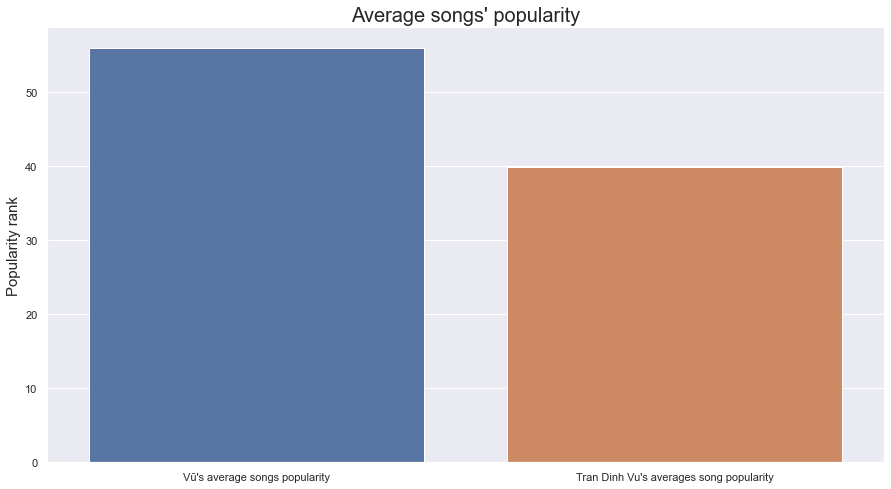

In [58]:
users_popularity = [user1 + "'s average songs popularity", user2 + "'s averages song popularity"]
popularity = [songs_df_1["popularity"].mean(), songs_df_2["popularity"].mean()]
p = sns.barplot(x= users_popularity, y= popularity)
p.set_ylabel("Popularity rank", fontsize = 15)
p.set_title("Average songs' popularity", fontsize = 20)

In [59]:
def generateDictionary(dataframe, column):
    user_data = []
    if column not in dataframe:
        print("Column doesn't exist")
        return 0
    
    for row in dataframe[column]:
        row_data = row.replace("[","").replace("]","").replace("'","").split(", ")
        if row_data:
            user_data += row_data

    user_data = [i for i in user_data if i]

    user_dict = dict()

    for row in user_data:
        user_dict[row] = user_dict.get(row,0) + 1
    
    return user_dict

In [60]:
def plot(genres_dictionary, user_dataframe, feature):
    user_genres_dict = genres_dictionary
    username = user_dataframe["display_name"][0]
    def take(n, iterable):
        return dict(islice(iterable, n))

    sorted_user_genres =  {k: v for k, v in sorted(user_genres_dict.items(), 
                                                             reverse = True, key=lambda item: item[1])}
    top_10_user_genres = take(10, sorted_user_genres.items())

    p = sns.barplot(x = list(top_10_user_genres.values()), y = list(top_10_user_genres.keys()), orient = "h")
    p.set_xlabel("Count", fontsize = 15)
    p.set_title(username + "'s top " + feature, fontsize = 20)
    
#     plt.barh(list(top_10_user_genres.keys()), top_10_user_genres.values() , align='center')
#     plt.xlabel("Counts")
#     plt.ylabel(feature.capitalize())
#     plt.title(username + "'s top " + feature)
#     plt.show()

In [61]:
first_user_genres_dict = generateDictionary(songs_df_1, "genres")
second_user_genres_dict = generateDictionary(songs_df_2, "genres")

first_user_artists_dict = generateDictionary(songs_df_1, "artist")
second_user_artists_dict = generateDictionary(songs_df_2, "artist")

first_user_songs_dict = generateDictionary(songs_df_1, "id")
second_user_songs_dict = generateDictionary(songs_df_2, "id")

first_user_albums_dict = generateDictionary(songs_df_1, "album")
second_user_albums_dict = generateDictionary(songs_df_2, "album")

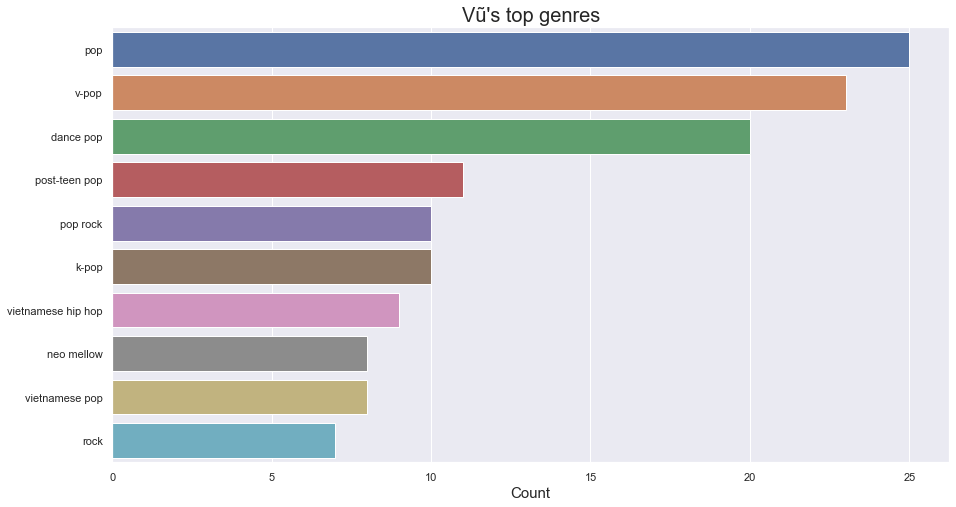

In [62]:
plot(first_user_genres_dict, user_info_df_1, "genres")

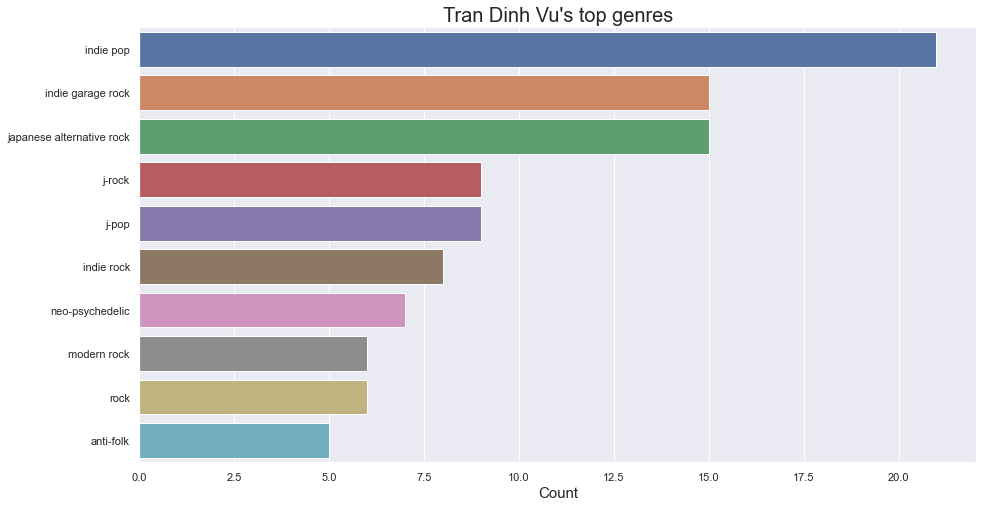

In [63]:
plot(second_user_genres_dict, user_info_df_2, "genres")

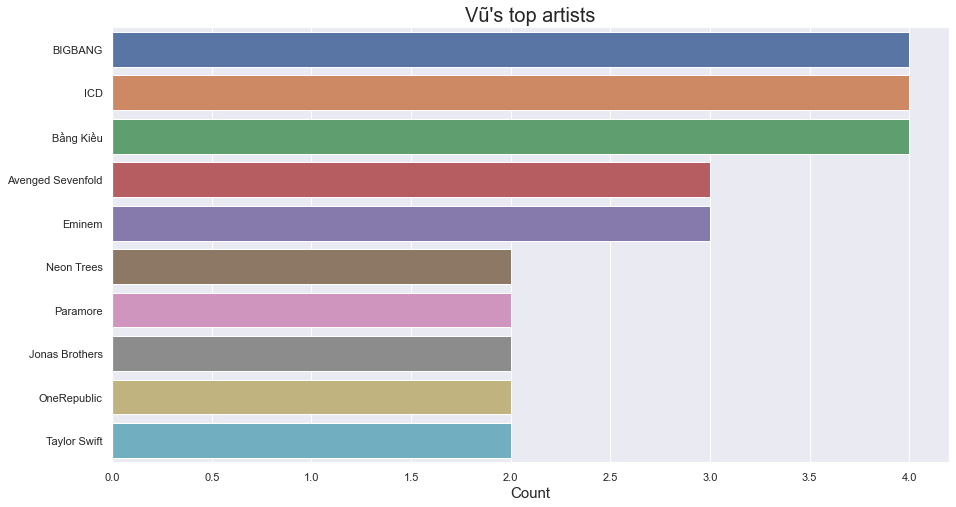

In [64]:
plot(first_user_artists_dict, user_info_df_1, "artists")

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12493 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12463 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12521 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12452 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12488 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12540 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12461 missing from current font.

C:\Users\truon\anaco

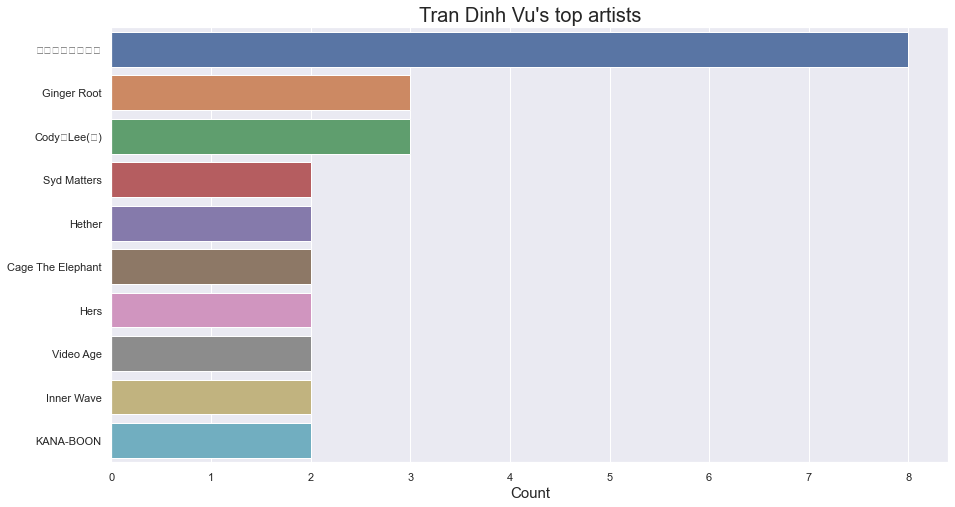

In [65]:
plot(second_user_artists_dict, user_info_df_2, "artists")

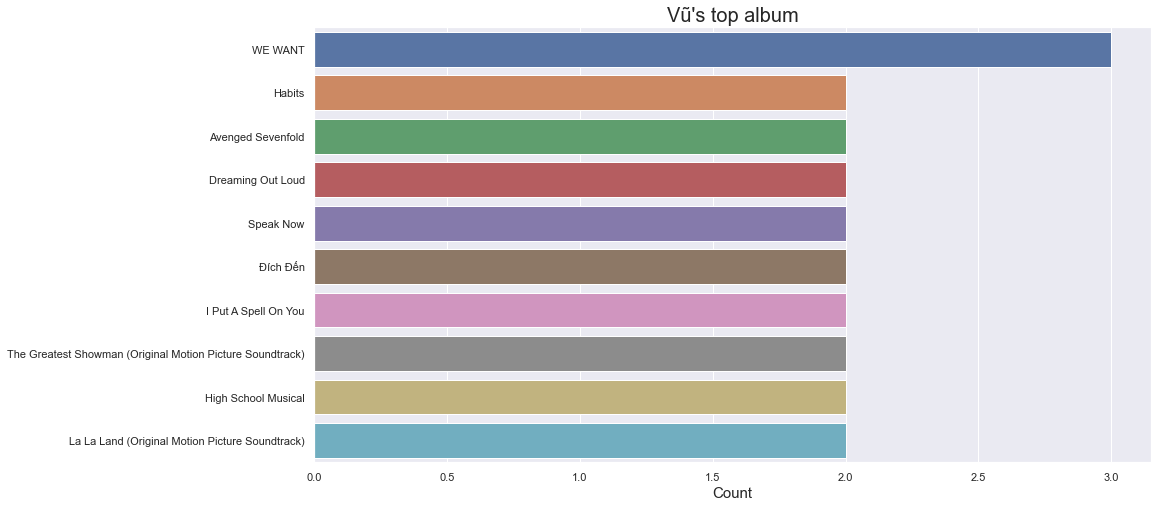

In [66]:
plot(first_user_albums_dict, user_info_df_1, "album")

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 22909 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12365 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12394 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12425 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 21839 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12431 missing from current font.

C:\Users\truon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12356 missing from current font.

C:\Users\truon\anaco

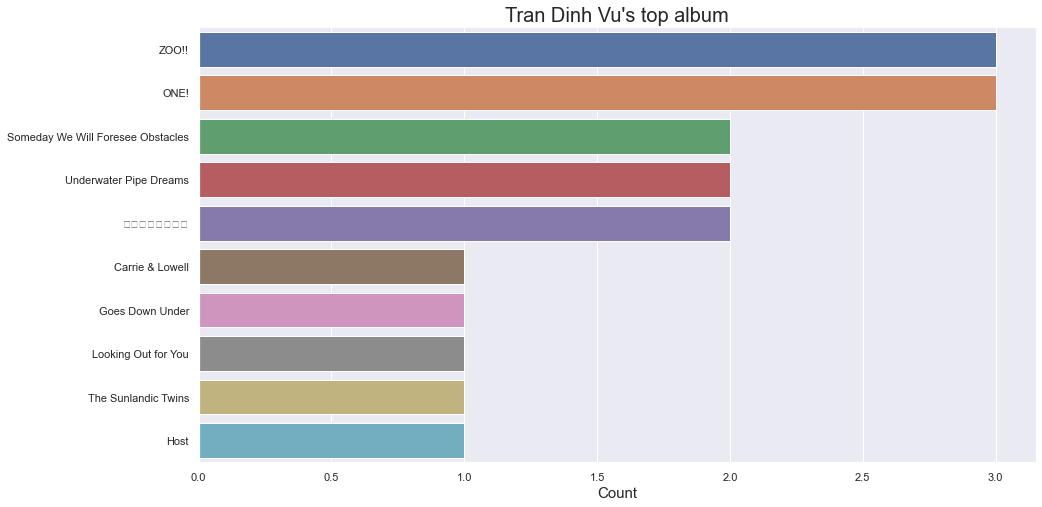

In [67]:
plot(second_user_albums_dict, user_info_df_2, "album")

In [68]:
import requests
from IPython.core.display import Image, display

def featureAnalysis(first_user_dict, second_user_dict, feature):
    first_user_feature = first_user_dict
    second_user_feature = second_user_dict
    
    common_features = dict()
    for key in first_user_feature:
        if key in second_user_feature:
            common_features[key] = min(first_user_feature[key], second_user_feature[key])
    
    if common_features:
        sorted_common_features =  {k: v for k, v in sorted(common_features.items(), 
                                                             reverse = True, key=lambda item: item[1])}
        
        keys = []
        counts = []
        print("Most common " + feature + ":")
        for i,key in enumerate(sorted_common_features):
            if i == 5: break
            if feature == "songs":
                song = songs_df_1.loc[songs_df_1["id"]==key].values[0]
                print(song[1] + " by " + song[2] + " in " + song[3])
                display(Image(url=song[6], width=300, height=300))
            else:
                print(key, sorted_common_features[key])
                keys.append(key)
                counts.append(sorted_common_features[key])
                p = sns.barplot(x = counts, y = keys, orient = "h")
                p.set_xlabel("Count", fontsize = 15)
                p.set_title("Common "  + feature, fontsize = 20)
      
    else:
        print("No common " + feature)
        
#     score = len(set(first_) & set(test_list2)) / float(len(set(test_list1) | set(test_list2))) * 100

In [69]:
featureAnalysis(first_user_songs_dict, second_user_songs_dict, "songs")

No common songs


Most common genres:
modern rock 6
rock 6
alternative rock 2
adult standards 2
mellow gold 2


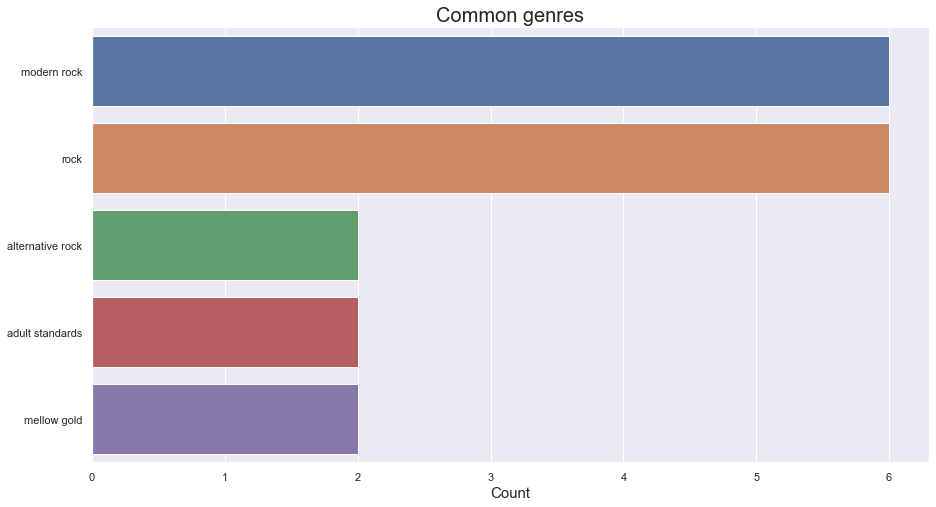

In [70]:
featureAnalysis(first_user_genres_dict, second_user_genres_dict, "genres")

In [71]:
featureAnalysis(first_user_artists_dict, second_user_artists_dict, "artists")

No common artists


In [72]:
def popularityAnalysis(first_dataframe, user_info_df_1, second_dataframe, user_info_df_2):
    print(user_info_df_1["display_name"][0] + "'s average songs' popularity is", first_dataframe["popularity"].mean())
    print(user_info_df_2["display_name"][0] + "'s average songs' popularity is", second_dataframe["popularity"].mean())
    print("\n")
    
    max_first_pop = first_dataframe.sort_values(by=["popularity"]).iloc[-1]
    min_first_pop = first_dataframe.sort_values(by=["popularity"]).iloc[0]
    
    print(user_info_df_1["display_name"][0] + "'s most and least popular songs are")                                                
    print(max_first_pop["song"] + " by " + max_first_pop["artist"] + " with popularity " + str(max_first_pop["popularity"]))
    print(min_first_pop["song"] + " by " + min_first_pop["artist"] + " with popularity " + str(min_first_pop["popularity"]))
    print("\n")
    max_second_pop = second_dataframe.sort_values(by=["popularity"]).iloc[-1]
    min_second_pop = second_dataframe.sort_values(by=["popularity"]).iloc[0]
    
    print(user_info_df_2["display_name"][0] + "'s most and least popular songs are")
    print(max_second_pop["song"] + " by " + max_second_pop["artist"] + " with popularity " + str(max_second_pop["popularity"]))
    print(min_second_pop["song"] + " by " + min_second_pop["artist"] + " with popularity " + str(min_second_pop["popularity"]))

In [73]:
popularityAnalysis(songs_df_1, user_info_df_1, songs_df_2, user_info_df_2)

Vũ's average songs' popularity is 56.0
Tran Dinh Vu's average songs' popularity is 39.96638655462185


Vũ's most and least popular songs are
drivers license by Olivia Rodrigo with popularity 90
Bao Lời Hoa Mỹ by Lynk Lee with popularity 7


Tran Dinh Vu's most and least popular songs are
Looking Out for You by Joy Again with popularity 82
In My Mind (feat. Brian Viglione) by Amanda Palmer with popularity 0


### Audio features visualizations

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

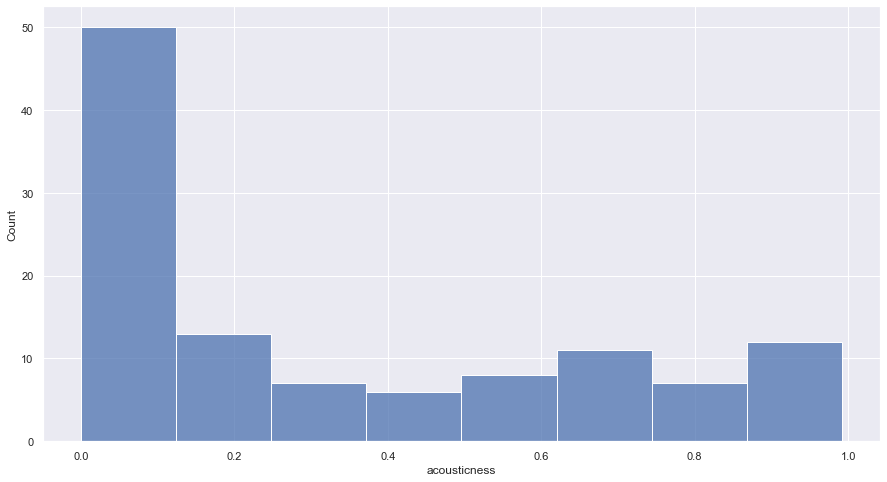

In [154]:
af1_values = audio_features_df_1.drop(["id"], axis = 1)
af2_values = audio_features_df_2.drop(["id"], axis = 1)

sns.histplot(x=audio_features_df_1["acousticness"])

In [139]:
af1_values_df = audio_features_df_1.drop(["id","tempo","key","loudness"], axis = 1)
audio_features_1_mean = af1_values_df.mean()
audio_features_1_mean

af2_values_df = audio_features_df_2.drop(["id","tempo","key","loudness"], axis = 1)
audio_features_2_mean = af2_values_df.mean()
audio_features_2_mean

danceability        0.544231
energy              0.596431
mode                0.644628
speechiness         0.062743
acousticness        0.386795
instrumentalness    0.167217
liveness            0.174400
valance             0.491796
dtype: float64

In [140]:
audio_features_1_mean

danceability        0.545649
energy              0.626214
mode                0.543860
speechiness         0.057931
acousticness        0.331253
instrumentalness    0.032271
liveness            0.165491
valance             0.419654
dtype: float64

In [141]:
features = ["danceability","energy","mode","speechiness","acousticness",
    "instrumentalness", "liveness", "valance"]

polar_audio_features_1 = pd.DataFrame(dict(r = audio_features_1_mean, theta = features))
fig = px.line_polar(polar_audio_features_1, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [142]:
polar_audio_features_2 = pd.DataFrame(dict(r = audio_features_2_mean, theta = features))
fig = px.line_polar(polar_audio_features_2, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [143]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = audio_features_1_mean,
      theta=features,
      fill='toself',
      name=user1
))
fig.add_trace(go.Scatterpolar(
      r= audio_features_2_mean,
      theta=features,
      fill='toself',
      name=user2
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-0.5,0.7]
    )),
  showlegend=False
)

fig.show()

In [30]:
def similarityAnalysis(songs_df_1, user_info_df_1, songs_df_2, user_info_df_2, feature):
    if feature == "song":
        feature = "id"
    
    if feature == "genres":
        u1 = songs_df_1[feature].to_numpy()
        u2 = songs_df_2[feature].to_numpy()
        u1_set = set()
        u2_set = set()
        for item in u1:
            item = item.replace("[","").replace("]","").replace("'","").split(", ")
            for genre in item:
                u1_set.add(genre)
        for item in u2:
            item = item.replace("[","").replace("]","").replace("'","").split(", ")
            for genre in item:
                u2_set.add(genre)
                
        similarity = len(set(u1_set) & set(u2_set))/len(set(u1_set) | set(u2_set))*100
    
    else:
        u1 = songs_df_1[feature]
        u2 = songs_df_2[feature]
        u1.drop_duplicates(keep = "first", inplace = True)
        u2.drop_duplicates(keep = "first", inplace = True)
        similarity = len(pd.merge(u1, u2, how = "inner").index)/len(pd.merge(u1, u2, how = "outer").index)*100
    
    return similarity


In [31]:
print("Songs similarity",similarityAnalysis(songs_df_1, user_info_df_1, songs_df_2, user_info_df_2, "song"),"%")
print("Aritsts similarity", similarityAnalysis(songs_df_1, user_info_df_1, songs_df_2, user_info_df_2, "artist"), "%")
print("Albums similarity", similarityAnalysis(songs_df_1, user_info_df_1, songs_df_2, user_info_df_2, "album"), "%")
print("Popularity similarity", similarityAnalysis(songs_df_1, user_info_df_1, songs_df_2, user_info_df_2, "popularity"), '%')
print("Genres similiarity", similarityAnalysis(songs_df_1, user_info_df_1, songs_df_2, user_info_df_2, "genres"), "%")

Songs similarity 0.0 %
Aritsts similarity 0.0 %
Albums similarity 0.0 %
Popularity similarity 37.5 %
Genres similiarity 9.090909090909092 %


## ... Recommendation System in progress ...

In [32]:
def toList(x):
    return x.replace(" ", "").replace("'","").replace("[","").replace("]","").split(",")
songs_df_1["genres"] = songs_df_1["genres"].apply(toList)
songs_df_1["genres"]

0      [modernalternativerock, modernrock, pop, popro...
1                  [dancepop, pop, poprap, post-teenpop]
2                                           [modernrock]
3                            [alternativemetal, numetal]
4                            [alternativemetal, numetal]
                             ...                        
109                                              [v-pop]
110    [canadianpop, candypop, dancepop, pop, post-te...
111    [canadianpop, candypop, dancepop, pop, post-te...
112                            [k-pop, koreanmasksinger]
113                            [neomellow, pop, poprock]
Name: genres, Length: 114, dtype: object

In [33]:
type(songs_df_1["genres"][0])

list

In [34]:
def mergeList(x):
    return ' '.join(x['genres'])

In [35]:
songs_df_1["genres"] = songs_df_1.apply(mergeList, axis=1)
songs_df_1["genres"]

0      modernalternativerock modernrock pop poprock rock
1                       dancepop pop poprap post-teenpop
2                                             modernrock
3                               alternativemetal numetal
4                               alternativemetal numetal
                             ...                        
109                                                v-pop
110       canadianpop candypop dancepop pop post-teenpop
111       canadianpop candypop dancepop pop post-teenpop
112                               k-pop koreanmasksinger
113                                neomellow pop poprock
Name: genres, Length: 114, dtype: object

Datacamp reference/ I'm working on a way to embed the audio features in

In [36]:
count = CountVectorizer()
count_matrix = count.fit_transform(songs_df_1["genres"])

In [37]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
songs_df_1 = songs_df_1.reset_index()
indices = pd.Series(songs_df_1.index, index=songs_df_1['song'])

In [38]:
def get_recommendations(title, cosine_sim=cosine_sim2):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    
    return songs_df_1['song'].iloc[song_indices]

In [39]:
get_recommendations('Lighters', cosine_sim2)

11                      Beautiful
54                     The Search
56               'Till I Collapse
57                     The Ringer
55               Forgot About Dre
27    Cooler Than Me - Single Mix
46                          A Boy
26                      Rocketeer
1                         What If
0                          Animal
Name: song, dtype: object

## K nearest neighbors with audio features

In [40]:
audio_features_df_1 = pd.read_csv("audio_features_1.csv")
audio_features_df_1

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valance,tempo
0,1fBl642IhJOE5U319Gy2Go,0.482,0.833,5,-5.611,1,0.0449,0.000346,0.000000,0.3650,0.7400,148.039
1,4IBuAtdsM6psUgfhHgoy4e,0.429,0.757,1,-2.912,1,0.0306,0.140000,0.000000,0.1440,0.5380,82.517
2,5rLi8B8qgk6qThwRnKHW2P,0.436,0.893,9,-4.180,0,0.0556,0.000362,0.000000,0.1030,0.0794,124.113
3,7zAt4tdL44D3VuzsvM0N8n,0.487,0.949,2,-4.217,0,0.0798,0.000429,0.000029,0.2310,0.4060,110.020
4,1BLfQ6dPXmuDrFmbdfW7Jl,0.486,0.881,2,-5.623,0,0.0474,0.024400,0.000000,0.4290,0.6670,144.997
...,...,...,...,...,...,...,...,...,...,...,...,...
109,5nD5PVXUkIpv0WcwfNFrgS,0.593,0.263,7,-12.102,0,0.0384,0.918000,0.000001,0.1040,0.4660,119.645
110,54JKnDB3CzVu8wNAOM27BI,0.457,0.719,4,-3.921,0,0.0323,0.191000,0.000000,0.2280,0.1680,142.034
111,6sqNctd7MlJoKDOxPVCAvU,0.414,0.936,2,-2.407,1,0.0758,0.001360,0.000000,0.3690,0.7400,170.229
112,0ZeGfEAL5Rl4pd5LZBGuEK,0.658,0.749,9,-2.967,0,0.0634,0.238000,0.000002,0.2720,0.4420,128.909


In [41]:
X = audio_features_df_1.drop('id', axis = 1)
X
X_np = X.to_numpy()
X_np[0]

array([ 4.82000e-01,  8.33000e-01,  5.00000e+00, -5.61100e+00,
        1.00000e+00,  4.49000e-02,  3.46000e-04,  0.00000e+00,
        3.65000e-01,  7.40000e-01,  1.48039e+02])

In [42]:
knn = NearestNeighbors(n_neighbors=11)
knn.fit(X_np)
NearestNeighbors(algorithm='auto', n_neighbors=5, p=2,radius=1.0)

NearestNeighbors()

In [43]:
res = knn.kneighbors([X_np[0]], return_distance=False)
res[0]

array([  0,   5,   4, 101,  22,  92, 110,  62,  90,  78,  64], dtype=int64)

In [44]:
for r in res[0]:
    print(audio_features_df_1.iloc[r])

id                  1fBl642IhJOE5U319Gy2Go
danceability                         0.482
energy                               0.833
key                                      5
loudness                            -5.611
mode                                     1
speechiness                         0.0449
acousticness                      0.000346
instrumentalness                       0.0
liveness                             0.365
valance                               0.74
tempo                              148.039
Name: 0, dtype: object
id                  7Hr1Ignop7cymbE3FbOtXa
danceability                         0.286
energy                               0.703
key                                      4
loudness                            -4.491
mode                                     0
speechiness                         0.0348
acousticness                       0.00847
instrumentalness                  0.000074
liveness                             0.142
valance                        